In [ ]:
!pip install nltk
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_csv('instagram.csv')

In [ ]:
df.colnums

AttributeError: ignored

In [ ]:
sample_size = 35000
df = df.head(sample_size)

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

def cleantext(text):
    # Removing mentions
    text = re.sub(r"@[0-9a-zA-Z]+", "", text)
    # Removing '#' from reviews
    text = re.sub(r"#", "", text)
    # Removing hyperlinks
    text = re.sub(r"https?:\\/\\/\\S+", "", text)
    # Removing punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001FB00-\U0001FBFF"  # Symbols and Pictographs Extended-B
                           u"\U0001FC00-\U0001FCFF"  # Symbols and Pictographs Extended-C
                           u"\U0001FD00-\U0001FDFF"  # Symbols and Pictographs Extended-D
                           u"\U0001FE00-\U0001FEFF"  # Combining Diacritical Marks Extended
                           u"\U0001FF00-\U0001FFFF"  # Greek Extended
                           "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)

    # Tokenize the text
    words = text.split()

    # Remove common stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Reconstruct the text
    text = ' '.join(words)

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df[cleaned]=df[review_description].apply(cleantext )

NameError: ignored

In [ ]:
#def calculate_sentiments(ds):
    #sentiments = TextBlob(ds['review_description']).sentiment
    #return pd.Series([sentiments.subjectivity, sentiments.polarity])

In [ ]:
#df[['Subjectivity', 'Polarity']] = df.apply(calculate_sentiments, axis = 1)
#df.head()

In [ ]:
#def categorize_sentiment(score):
   # if score < 0:
       # return "Negative"
    #elif score == 0:
       # return "Neutral"
    #else:
       # return "Positive"


In [ ]:
#df['Sentiment Analysis'] = df['Polarity'].apply(categorize_sentiment)
#df.head(200)

In [ ]:
#positive_reviews = df[df['Sentiment Analysis'] == 'Positive']
#negative_reviews = df[df['Sentiment Analysis'] == 'Negative']
#neutral_reviews = df[df['Sentiment Analysis'] == 'Neutral']

In [ ]:
#positive_reviews['tokens'] = positive_reviews['review_description'].apply(lambda x: TextBlob(x).words)
#negative_reviews['tokens'] = negative_reviews['review_description'].apply(lambda x: TextBlob(x).words)
#neutral_reviews['tokens'] = neutral_reviews['review_description'].apply(lambda x: TextBlob(x).words)



<ipython-input-11-52f5c09e55cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['tokens'] = positive_reviews['review_description'].apply(lambda x: TextBlob(x).words)
<ipython-input-11-52f5c09e55cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['review_description'].apply(lambda x: TextBlob(x).words)
<ipython-input-11-52f5c09e55cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
df

,review_description,rating,review_date,Subjectivity,Polarity,Sentiment Analysis
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07,0.444017,0.058547,Positive
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09,0.369259,-0.138148,Negative
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58,0.465741,0.310648,Positive
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57,0.462500,0.108594,Positive
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,0.384307,0.109686,Positive
...,...,...,...,...,...,...
34190,After upadate in notes section music 🎵 option ...,2,2023-06-30 12:52:40,0.000000,0.000000,Neutral
34191,Actually maybe one of the few people who didn'...,4,2022-06-14 19:43:57,0.563636,0.239063,Positive
34192,Amazing app Easily share your thought with fri...,5,2023-07-21 13:06:29,0.866667,0.516667,Positive
34193,why is my Instagram updating late? i am only g...,1,2023-07-04 08:16:01,0.483333,0.022656,Positive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Split data into features (X) and target (y)
X = df[['Sentiment Analysis', 'review_description']]
y = df['rating']

# Perform one-hot encoding for the 'Sentiment' column
X = pd.concat([X[['review_description']], pd.get_dummies(X['Sentiment Analysis'], prefix='Sentiment Analysis')], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review_description'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['review_description'])

# Convert sparse TF-IDF matrices to dense arrays
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_tfidf.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Added L2 regularization
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Added L2 regularization
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Added L2 regularization
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model with early stopping
history = model.fit(
    X_train_tfidf, y_train,
    epochs=60, batch_size=20,
    validation_split=0.2,
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_tfidf, y_test)
print(f'Test Loss: {test_loss}')


Epoch 1/60
1095/1095 [==============================] - 47s 41ms/step - loss: 2.5575 - val_loss: 1.8512
Epoch 2/60
1095/1095 [==============================] - 39s 36ms/step - loss: 2.0889 - val_loss: 1.7930
Epoch 3/60
1095/1095 [==============================] - 39s 35ms/step - loss: 1.9900 - val_loss: 1.7858
Epoch 4/60
1095/1095 [==============================] - 36s 33ms/step - loss: 1.9340 - val_loss: 1.7345
Epoch 5/60
1095/1095 [==============================] - 38s 34ms/step - loss: 1.9149 - val_loss: 1.7446
Epoch 6/60
1095/1095 [==============================] - 40s 37ms/step - loss: 1.8791 - val_loss: 1.7209
Epoch 7/60
1095/1095 [==============================] - 37s 34ms/step - loss: 1.8460 - val_loss: 1.7361
Epoch 8/60
1095/1095 [==============================] - 37s 34ms/step - loss: 1.8210 - val_loss: 1.7824
Epoch 9/60
1095/1095 [==============================] - 36s 33ms/step - loss: 1.8180 - val_loss: 1.7239
Epoch 10/60
1095/1095 [==============================] - 37s 33m

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your model and have predictions on the test set
# Replace 'y_pred' with your model's predictions
y_pred = model.predict(X_test_tfidf)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

214/214 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 1.22
Root Mean Squared Error (RMSE): 1.11
Mean Absolute Error (MAE): 0.91
R-squared (R²): 0.42


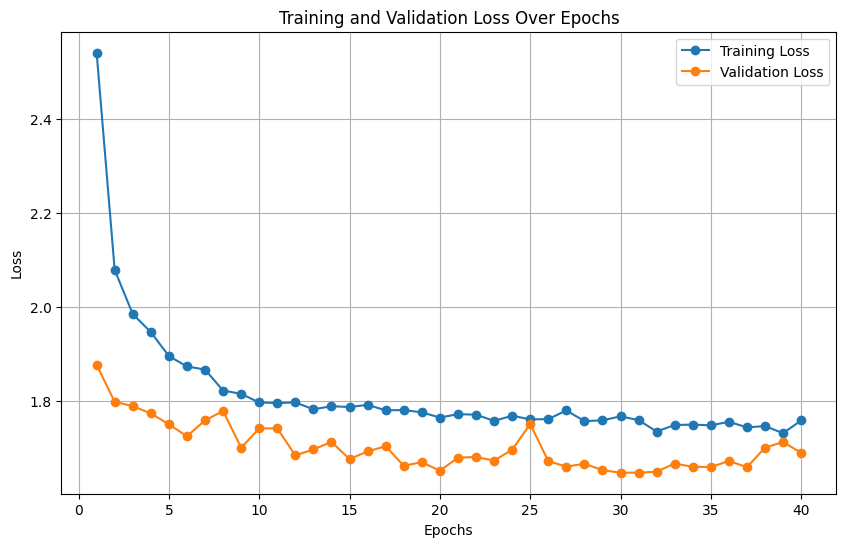

In [ ]:
import matplotlib.pyplot as plt

# Your epoch and loss values
epochs = range(1, 41)  # Assuming 40 epochs

# Training and validation loss values for the epochs you provided
training_loss = [
    2.5419, 2.0792, 1.9852, 1.9468, 1.8957, 1.8737, 1.8670, 1.8223, 1.8153, 1.7969,
    1.7957, 1.7970, 1.7824, 1.7890, 1.7872, 1.7919, 1.7802, 1.7808, 1.7758, 1.7649,
    1.7720, 1.7710, 1.7577, 1.7687, 1.7609, 1.7615, 1.7799, 1.7573, 1.7588, 1.7674,
    1.7593, 1.7350, 1.7490, 1.7498, 1.7482, 1.7558, 1.7439, 1.7466, 1.7315, 1.7587
]

validation_loss = [
    1.8771, 1.7982, 1.7892, 1.7735, 1.7505, 1.7249, 1.7588, 1.7788, 1.7005, 1.7417,
    1.7417, 1.6842, 1.6969, 1.7128, 1.6764, 1.6927, 1.7037, 1.6621, 1.6699, 1.6514,
    1.6794, 1.6808, 1.6731, 1.6963, 1.7510, 1.6721, 1.6602, 1.6665, 1.6527, 1.6473,
    1.6476, 1.6494, 1.6669, 1.6598, 1.6594, 1.6724, 1.6590, 1.7009, 1.7127, 1.6896
]

# Ensure both lists have the same number of elements
if len(epochs) != len(training_loss) or len(epochs) != len(validation_loss):
    min_length = min(len(epochs), len(training_loss), len(validation_loss))
    epochs = epochs[:min_length]
    training_loss = training_loss[:min_length]
    validation_loss = validation_loss[:min_length]

# Create a figure and axis for the line chart
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')

# Plot validation loss
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.grid()
plt.show()
